# HW03

## Some exercises to get started with data analysis in Python

### Setup

Run the following 2 cells to import all necessary libraries and helpers for Homework 02

In [27]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py

In [28]:
import matplotlib.pyplot as plt

from HW03_utils import Tests
from data_utils import object_from_json_url

### Exercise 01:

Finding the sum of integer sequences.

Create a function ```sum_of_ints(i0, i1)``` that returns the sum of all integers between two integers.

For example, ```sum_of_ints(4, 32)``` should return $522$.


In [29]:
## Work on exercise 01 here

def sum_of_ints(i0, i1):
  # TODO: fill in this function
  return sum(range(i0, i1 + 1))

print(sum_of_ints(4,32))


522


### Exercise 01 testing:

Running the following cell will test the ```sum_of_ints()``` function on a small set of input pairs and report any combination that isn't computing correctly, if any.

In [30]:
# Test 01
Tests.test("01", sum_of_ints)

ERROR Check sum of sum_of_ints(-46, -94) should be -3430 not 0
ERROR Check sum of sum_of_ints(43, 15) should be 841 not 0
ERROR Check sum of sum_of_ints(82, 51) should be 2128 not 0


### Exercise 02:

Working with lists and dictionaries/objects.

Write a function `sum_objects(in_list)` that accept a list of objects and returns a sum according to the following specifications:

Each object in the list has 2 fields, `type` and `amount`, and so will look something like this:

```python
list = [
  { "type": "cost", "amount": 10.00 },
  { "type": "cost", "amount": 15.99 },
  { "type": "income", "amount": 150.25 },
  { "type": "income", "amount": 243.52 },
]
```

The `sum_objects(in_list)` function should iterate through all of the items in `in_list` and sum their `amount`s using positive values when `type` is `"income"`, and negative values when `type` is `"cost"`.

For example, passing the above list to the function should return $367.78$.

In [31]:
list = [
  { "type": "cost", "amount": 10.00 },
  { "type": "cost", "amount": 15.99 },
  { "type": "income", "amount": 150.25 },
  { "type": "income", "amount": 243.52 },
]

# Implement 02 here
def sum_objects(in_list):
  # TODO: fill this in
  all_income = 0
  all_cost = 0
  
  for x in in_list:
    if x["type"] == "cost":
        all_cost += x["amount"]
    elif x["type"] == "income":
        all_income += x["amount"]
  return all_income - all_cost

sum_objects(list)

367.78

In [32]:
# Run this cell to test if function returns 367.78

test_list = [
  { "type": "cost", "amount": 10.00 },
  { "type": "cost", "amount": 15.99 },
  { "type": "income", "amount": 150.25 },
  { "type": "income", "amount": 243.52 },
]

sum_objects(test_list)

367.78

#### Exercise 02 test:

Run the following cell to test the `sum_objects()` function.

In [33]:
# Test 02
Tests.test("02", sum_objects)

ERROR Check sum of [{'type': 'income', 'amount': 21.5}, {'type': 'cost', 'amount': 82.77}, {'type': 'income', 'amount': 52.21}, {'type': 'cost', 'amount': 31.77}, {'type': 'cost', 'amount': 62.23}] should be -103.06 not -103.05999999999997
ERROR Check sum of [{'type': 'cost', 'amount': 99.2}, {'type': 'income', 'amount': 73.47}, {'type': 'cost', 'amount': 94.93}, {'type': 'cost', 'amount': 42.33}, {'type': 'cost', 'amount': 36.27}, {'type': 'cost', 'amount': 31.04}, {'type': 'cost', 'amount': 18.74}] should be -249.04000000000002 not -249.04
ERROR Check sum of [{'type': 'income', 'amount': 11.71}, {'type': 'cost', 'amount': 38.1}, {'type': 'cost', 'amount': 53.46}, {'type': 'income', 'amount': 86.24}, {'type': 'income', 'amount': 58.45}, {'type': 'income', 'amount': 56.47}, {'type': 'cost', 'amount': 64.17}, {'type': 'cost', 'amount': 58.0}, {'type': 'income', 'amount': 51.81}, {'type': 'cost', 'amount': 87.0}, {'type': 'cost', 'amount': 17.78}, {'type': 'cost', 'amount': 55.04}] shoul

### Exercise 03:

Working with data files.

Find the name and population of the 3 cities that are geographically closest to the world's most populous city.

# 🤔😱


#### Load Data:

Let's break this down into a few sub-problems.

First, let's load a JSON file that has information about large cities in the world.

The file at this [URL](https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/cities50k.json) has a list of cities formatted like this:

```py
{
  "name": "Pittsburgh",
  "country": "US",
  "admin1": "Pennsylvania",
  "lat": 40.4406200,
  "lon": -79.9958900,
  "pop": 304391
}
```

This is just like how we loaded ANSUR data files in class:

In [34]:
# Define the location of the json file here
CITIES_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/cities50k.json"

# Use the object_from_json_url() function to load contents from 
# the json file into a Python object called "info_cities"

info_cities = object_from_json_url(CITIES_FILE)

#### Exercise 03A:

Ok. We should now have a list of objects with information about cities.

Explore the data and answer the following questions:
- How many cities are in this list?
- What's the name of the first city on the list?
- What are the latitude and longitude of the last city on the list?
- What are the populations for the largest and smallest cities?
- What's the name of the city with the largest population?


In [35]:
# Work on 03A here
# How many cities are in the list?

num_cities = len(info_cities)
print(num_cities)


# What's the name of the first city on the list?

first_city = info_cities[0]['name']
print(first_city)


# What are the latitude and longitude of the last city on the list?
last_city = info_cities[-1]
last_latitude = info_cities[-1]['lat']
last_longitude = info_cities[-1]['lon']

print(last_latitude)
print(last_longitude)

# What are the populations for the largest and smallest cities?
all_populations = [C["pop"] for C in info_cities]
largest_population = max(all_populations)
smallest_population = min(all_populations)
print(largest_population)
print(smallest_population)


# What's the name of the city with the largest population?
largest_city_name = max(info_cities, key=lambda city: city["pop"])["name"]
print(largest_city_name)


8670
Abu Dhabi
-17.88333
30.7
22315474
50011
Shanghai


#### Test 03A

In [36]:
# Test 03A
print("num_cities:", num_cities)
print("first_city:", first_city)
print("last_latitude:", last_latitude)
print("last_longitude:", last_longitude)
print("largest_population:", largest_population)
print("smallest_population:", smallest_population)
print("largest_city_name:", largest_city_name)
answers = [num_cities, first_city, last_latitude, last_longitude, largest_population, smallest_population, largest_city_name]

Tests.test("03A", answers)

num_cities: 8670
first_city: Abu Dhabi
last_latitude: -17.88333
last_longitude: 30.7
largest_population: 22315474
smallest_population: 50011
largest_city_name: Shanghai
03A: All tests passed 🎉🎉🎉


#### Exercise 03B:

We have the largest city's name and population, but we need its position.

We can recycle some of the logic from above to get the whole object that contains information for the largest city.

In [99]:
# Work on 03B here

largest_city = max(info_cities, key=lambda city: city["pop"])
largest_city_position = info_cities.index(largest_city)
print(largest_city_position)


1560


In [38]:
# Test 03B
Tests.test("03B", largest_city)

03B: All tests passed 🎉🎉🎉


#### Exercise 03C:

We should have all info about the largest city here.

Now, we'll iterate through the list and use each city's latitude and longitude to calculate its distance from the largest city.

Althought not $100\%$ correct, it's ok to use the [2D Euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance#Two_dimensions) for this.

Could be useful to define a function `distance(cityA, cityB)` that returns the distance between two cities.

In [39]:
# Work on 03C here

# Implement the helper function for calculating distances between 2 cities

def distance(cityA, cityB):
  P1 = cityA.get('lat')
  Q1 = cityA.get('lon')

  P2 = cityB.get('lat')
  Q2 = cityB.get('lon')
  
  return round(((P1 - P2) ** 2 + (Q1 - Q2) ** 2) ** 0.5, 2)

In [40]:
# Test 03C
Tests.test("03C", distance)

03C: All tests passed 🎉🎉🎉


#### Exercise 03D:

Ok. We implemented a function to calculate the distance between 2 cities, let's use it now.

Iterate through the list of cities again, calculate the distance from each city to the largest city, and add that as a new feature/key to each city's entry:

```py
{
  "name": "Pittsburgh",
  "country": "US",
  "admin1": "Pennsylvania",
  "lat": 40.4406200,
  "lon": -79.9958900,
  "pop": 304391,
  "distance": 1222.32
}
```


Or, iterate through the list of cities, calculate the distance from each city to the largest city and save the name, population and distance of each city on a separate list, maybe called `city_distances`.

`city_distances` could look something like this:

```py
[
  { "name": "Abu Dhabi", "pop": 603492, "distance": 12.34 },
  { "name": "Ajman City", "pop": 490035, "distance": 98.76 },
  ...
  { "name": "Norton", "pop": 52054, "distance": 56.78 }
]
```

Just make sure the `key` that holds the distance value is called `distance`.

In [41]:
# Work on 03D here

# Now calculate every city's distance from the largest city and
# add that info to each city's entry or save that on a new list
# with their name and pop
def nameBigPop(city):
    return city["pop"]

def find_largest_city(cities):
    return max(cities, key=nameBigPop)

def city_distance_from_largest(cities): 
    largest_city = find_largest_city(cities)
    city_distances = []
    for city in cities:
        dist = distance(city, largest_city)
        city_distances.append({
            'name': city['name'], 
            'pop': city['pop'],
            'distance': dist
        })
    return city_distances
city_distances = city_distance_from_largest(info_cities)


In [42]:
print(city_distances)
# Test 03D
Tests.test("03D", city_distances)

# OR
# Tests.test("03D", info_cities)

[{'name': 'Abu Dhabi', 'pop': 603492, 'distance': 67.4}, {'name': 'Ajman City', 'pop': 490035, 'distance': 66.24}, {'name': 'Al Ain City', 'pop': 55091, 'distance': 66.07}, {'name': 'Al Fujairah City', 'pop': 86512, 'distance': 65.4}, {'name': 'Al Shamkhah City', 'pop': 61710, 'distance': 67.1}, {'name': 'Bani Yas City', 'pop': 80498, 'distance': 67.19}, {'name': 'Dubai', 'pop': 2956587, 'distance': 66.43}, {'name': 'Khalifah A City', 'pop': 85374, 'distance': 67.2}, {'name': 'Musaffah', 'pop': 243341, 'distance': 67.33}, {'name': 'Ras Al Khaimah City', 'pop': 351943, 'distance': 65.74}, {'name': 'Reef Al Fujairah City', 'pop': 82310, 'distance': 65.49}, {'name': 'Sharjah', 'pop': 1324473, 'distance': 66.31}, {'name': 'Umm Al Quwain City', 'pop': 62747, 'distance': 66.15}, {'name': 'Zayed City', 'pop': 63482, 'distance': 68.17}, {'name': 'Baghlān', 'pop': 108449, 'distance': 52.98}, {'name': 'Balkh', 'pop': 114883, 'distance': 54.84}, {'name': 'Bāmyān', 'pop': 61863, 'distance': 53.75}

#### Exercise 03E:

Now, sort the array from the previous step by distance and get the name and population of the 3 cities closest to the largest city.

The answer should be an object where its keys are city names and values are populations.

Something like:

```python
closest_3 = {
  "pittsburgh": 23412,
  "liverpool": 172821,
  "oakland": 182726
}
```

We saw how to sort lists of objects in lecture.

In [96]:

# Work on 03E here

# Sort the array and get the name and population of the 3 cities closest to the largest city
sorted_cities= sorted(city_distances, key=lambda city: city['distance'])

closest_cities = sorted_cities[1:4]

closest_3 = {}

for city in closest_cities:
    closest_3[city['name']] = city['pop']

print(closest_3)

{'Songjiang': 130218, 'Zhujiajiao': 60000, 'Kunshan': 1600000}


In [80]:
# Test 03F
Tests.test("03E", closest_3)

03E: All tests passed 🎉🎉🎉


### Exercise 04:

Visualizing data files.


#### Loading The Data:

Let's load a JSON file that has information about houses in the Los Angeles metropolitan region of California.

The file at this [url](https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/LA_housing.json) has a list of objects formatted like this:

```python
{
  "longitude": -114.310,
  "latitude": 34.190,
  "age": 15,
  "rooms": 12.234,
  "bedrooms": 3.514,
  "value": 669000
}
```

The number of rooms and bedrooms are not integers because some addresses have multiple units/apartments with different floorplans that get averaged.

In [82]:
# Define the location of the json file
HOUSES_FILE = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/main/datasets/json/LA_housing.json"

# Use the object_from_json_url() function to load
# the json file into a Python object called "info_houses"

info_houses = object_from_json_url(HOUSES_FILE)

#### Exercise 04A:

Explore the data and answer the following questions:
- How many instances are there in our dataset?
- What's the value of the most expensive house?
- What's the max number of bedrooms in a house?
- What's the number of bedrooms in the house with the most rooms?
- What's the number of rooms in the house with the most bedrooms?

In [83]:
# Work on 04A here

# How many instances are there in our dataset?
# This is the same as asking "how many rows" or, in this case, "how many houses"
print(info_houses[2])
num_houses = len(info_houses)
print(num_houses)

# What's the value of the most expensive house?
price_of_house = (H["value"]for H in info_houses )
max_value = max(price_of_house)
print(max_value)


# What's the number of bedrooms in the house with the most bedrooms?
number_of_bedrooms = (H['bedrooms'] for H in info_houses)
most_bedrooms = max(number_of_bedrooms)
print(most_bedrooms)

# What's the number of bedrooms in the house with the most rooms?
# number_of_rooms = (H['rooms'] for H in info_houses)
# most_rooms = max(number_of_rooms)
# print(most_rooms)

def number_of_rooms(H):
    return H["rooms"]

bedrooms_in_most_rooms = max(info_houses, key=number_of_rooms)['bedrooms']
print(bedrooms_in_most_rooms)
# What's the number of rooms in the house with the most bedrooms?
def number_of_bedrooms(H): 
    return H["bedrooms"]

rooms_in_most_bedrooms = max(info_houses, key=number_of_bedrooms)['rooms']


{'longitude': -117.71, 'latitude': 34.1, 'age': 52, 'rooms': 4.5, 'bedrooms': 1.2063492063492063, 'value': 2125000}
5779
5497503
1.9259259259259258
1.75


In [84]:
# Test 04A
print("number of houses:", num_houses)
print("max value:", max_value)
print("most bedrooms:",  most_bedrooms)
print("number of bedrooms in the house with the most rooms:", bedrooms_in_most_rooms)
print("number of rooms in the house with the most bedrooms:", rooms_in_most_bedrooms)
answers = [num_houses, max_value, most_bedrooms, bedrooms_in_most_rooms, rooms_in_most_bedrooms]

Tests.test("04A", answers)

number of houses: 5779
max value: 5497503
most bedrooms: 1.9259259259259258
number of bedrooms in the house with the most rooms: 1.75
number of rooms in the house with the most bedrooms: 2.1481481481481484
04A: All tests passed 🎉🎉🎉


#### Exercise 04B:

Which of the features (`longitude`, `latitude`, `age`, `rooms` or `bedrooms`) is a better indicator for value of a house?

We're going to use XY scatter plots to visualize house value as a function of each of these features, and see if any of them show strong correlation.

Documentation for the plotting library is here:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

One thing to note is that the functions for plotting like to get lists of values and not lists of objects.

Before we plot anything, let's define a function `list_from_key(objs, key)` that returns a list with all values of feature `key` for all of the objects in `objs`.

In [94]:
# Work on 04B here

# helper function to get lists of values from specific key
def list_from_key(objs, key):
  # TODO: implement the list_from_key functionality
  values =[]
  for obj in objs:
    for key in obj:
      values.append(obj[key])
  return values


In [86]:
# Test 04B
Tests.test("04B", list_from_key)

ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't seem correct. There are too many elements
ERROR Length of returned list doesn't se

#### Exercise 04C:

Now we can actually plot some values and start looking for correlations.

Pick a feature and make a graph that shows house prices as a function of that feature.

You can also write a for loop to plot graphs for all features.

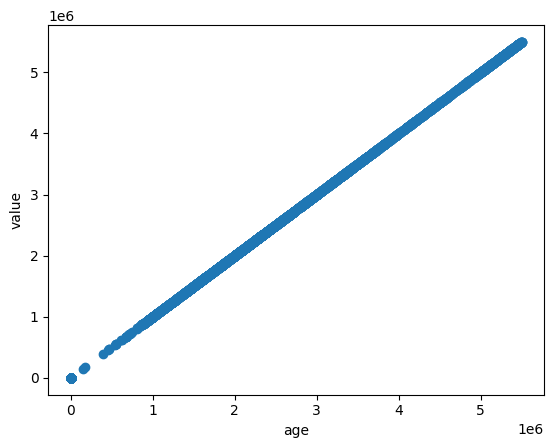

In [87]:
# Work on 04C here

# TODO: get a list with all of the price values
prices = list_from_key(info_houses, "price")

# TODO: get a list with all of the house ages (for example)
house_ages = list_from_key(info_houses, "ages")


# this is the command to plot a XY scatter plot from 2 lists
# see documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(house_ages, prices)
plt.xlabel("age")
plt.ylabel("value")
plt.show()

#### What are some features that correlate with price ?

Answer 04C here. Double-click to edit Markdown.

#### Foreshadowing:

What if we use two features at a time?

Is there a pair of features (`longitude`, `latitude`, `age`, `rooms` or `bedrooms`) that correlates to house value?

We could look at the relationship between `price`, `age` and `rooms`:

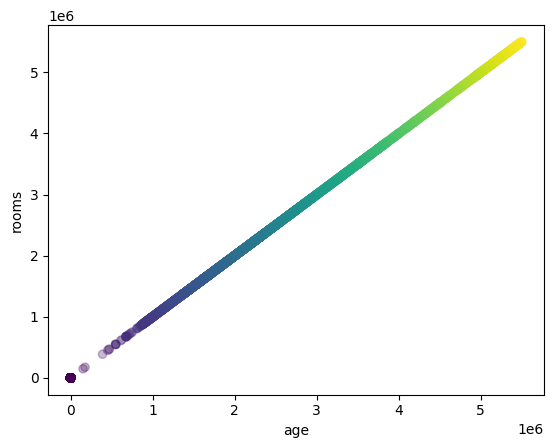

In [88]:
# get a list with all of the price values
prices = list_from_key(info_houses, "value")

# get a list with all of the values of one feature
feature_0_values = list_from_key(info_houses, "age")

# get a list with all of the values of another feature
feature_1_values = list_from_key(info_houses, "rooms")

# this is how we plot an XY scatter plot using 3 lists
# see documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(feature_0_values, feature_1_values, c=prices, alpha=0.3)
plt.xlabel("age")
plt.ylabel("rooms")
plt.show()

Or, we could write a little for loop to plot all possible pairs of features:

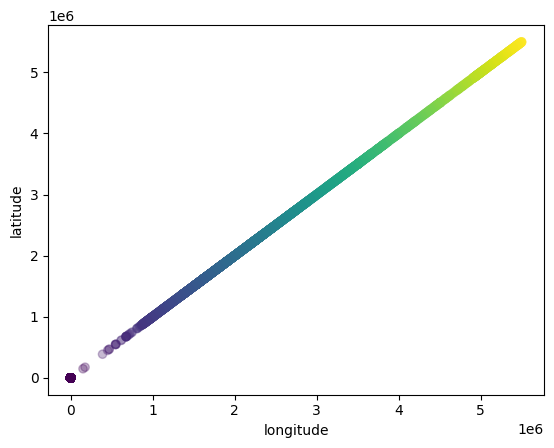

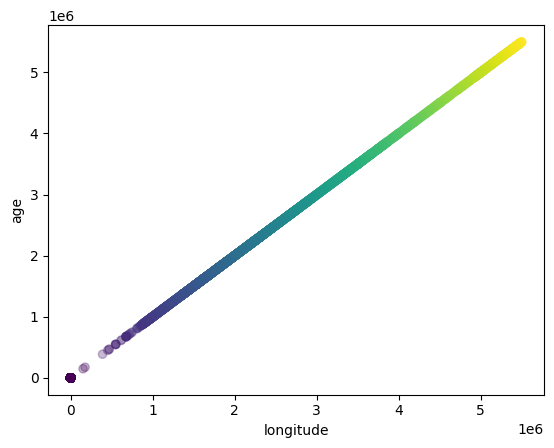

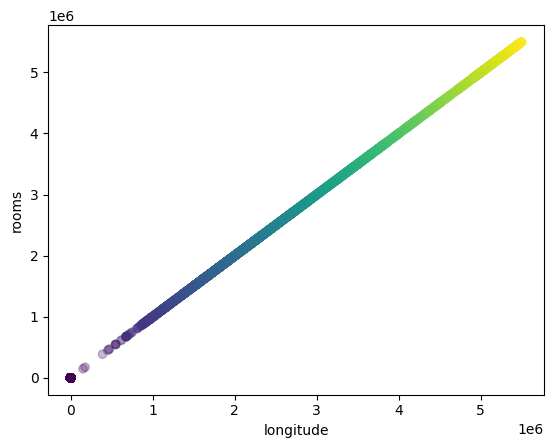

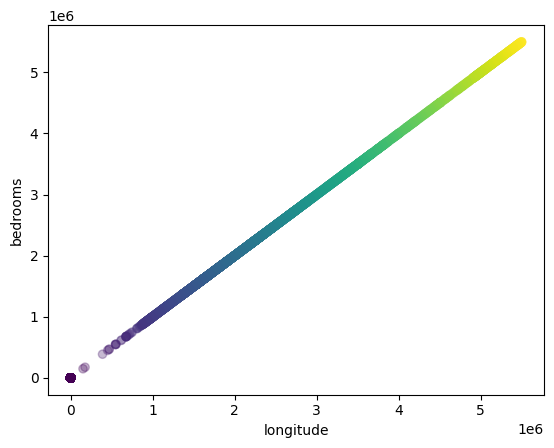

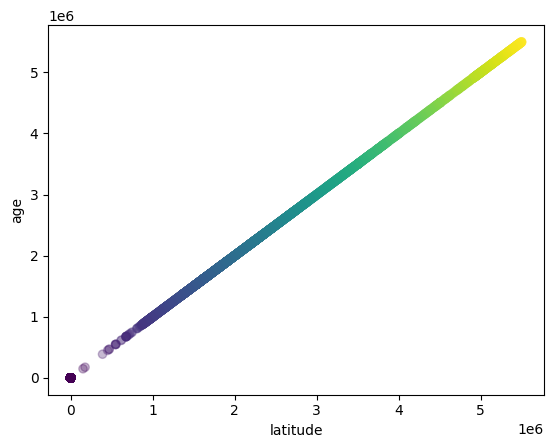

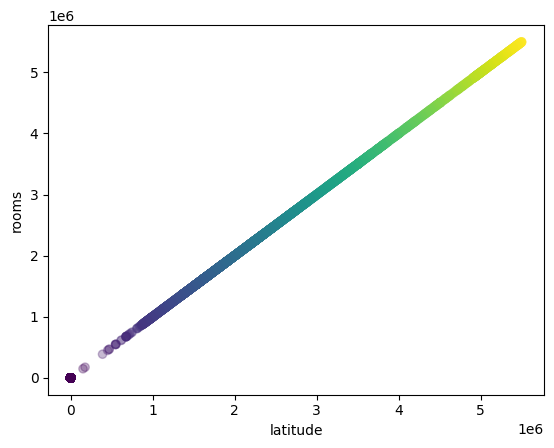

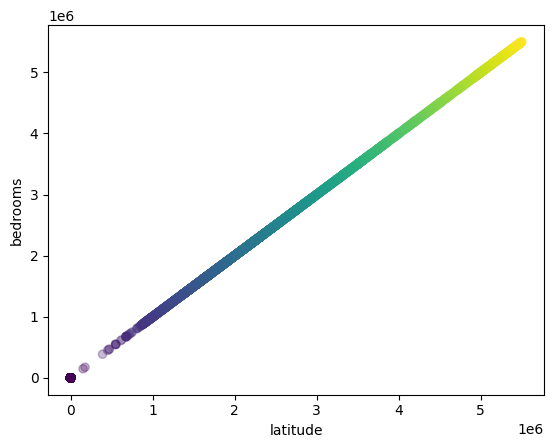

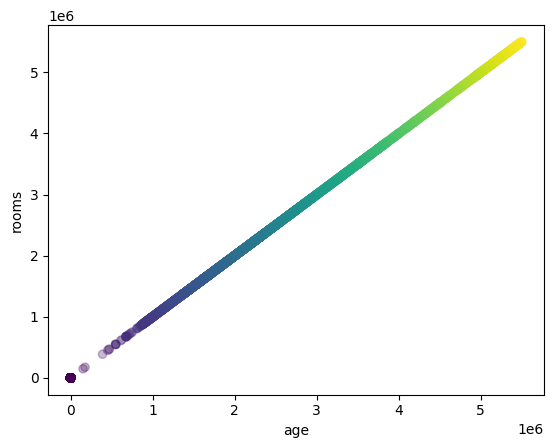

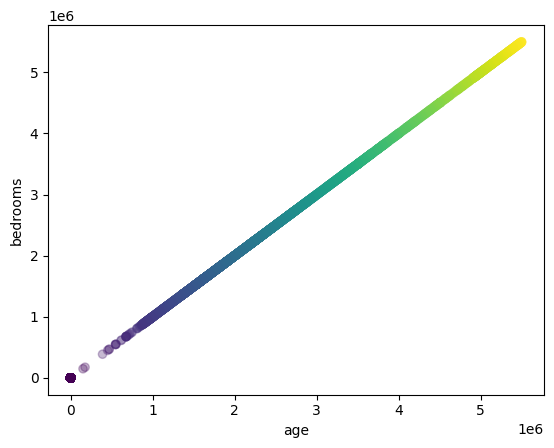

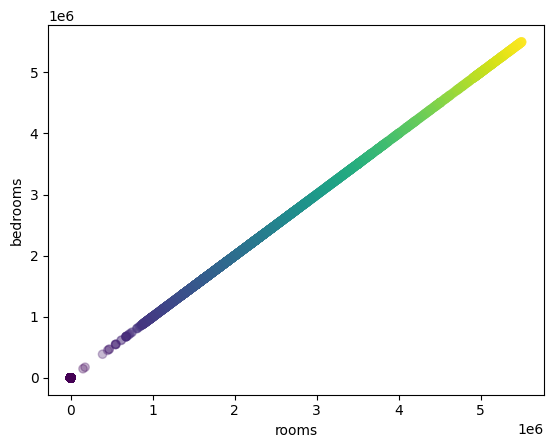

In [89]:
# to plot all feature pairs
# get list of all features
features = info_houses[0].keys()
prices = list_from_key(info_houses, "value")

# get all pairs of features
for idx_0, feature_0 in enumerate(features):
  x = list_from_key(info_houses, feature_0)
  for idx_1, feature_1 in enumerate(features):
    y = list_from_key(info_houses, feature_1)
    # skip repeated features
    if feature_0 != "value" and feature_1 != "value" and idx_1 > idx_0:
      plt.scatter(x, y, c=prices, alpha=0.3)
      plt.xlabel(feature_0)
      plt.ylabel(feature_1)
      plt.show()